# XGBoost Model in Python
https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

For reference, you can review the <a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html">XGBoost Python API reference</a>.

## Libraries and Data
In this section we will load the data from file and prepare it for use for training and evaluating an XGBoost model.

We start off by importing the classes and functions we intend to use.

In [233]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

Next, we can load the CSV file as a NumPy array using the NumPy function <b>loadtext()</b>.

In [4]:
# load data
import os
os.chdir('C:/Sereda/Lectures/Springboard/Capstone2_CustomerChurn/')
import pandas as pd
csv = 'data/df_20161022_onehot.csv'
dataset = pd.read_csv(csv)

We must separate the columns (attributes or features) of the dataset into input patterns (X) and output patterns (Y). We can do this easily by specifying the output column name to drop or include.

In [10]:
# split data into X and y
X = dataset.drop('is_churn', axis=1)
Y = dataset['is_churn']

Finally, we must split the X and Y data into a training and test dataset. The training set will be used to prepare the XGBoost model and the test set will be used to make new predictions, from which we can evaluate the performance of the model.

For this we will use the <b>train_test_split()</b> function from the scikit-learn library. We also specify a seed for the random number generator so that we always get the same split of data each time this example is executed.

In [12]:
# split data into train and test sets
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

We are now ready to train our model. XGBoost is essentially an ensemble algorithm comprised of decision trees, so it does not require <b>normalization (scaling)</b> for the inputs.

## Train the XGBoost Model
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.

This means we can use the full scikit-learn library with XGBoost models.

The XGBoost model for classification is called XGBClassifier. We can create and fit it to our training dataset. Models are fit using the scikit-learn API and the <b>model.fit()</b> function.

Parameters for training the model can be passed to the model in the constructor. Here, we use the sensible defaults.

In [44]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

[13:15:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

You can see the parameters used in a trained model by printing the model, if not shown above:

In [14]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


You can learn more about the defaults for the XGBClassifier and XGBRegressor classes in the <a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn">XGBoost Python scikit-learn API</a>.

You can learn more about the meaning of each parameter and how to configure them on the <a href="https://xgboost.readthedocs.io/en/latest//parameter.html">XGBoost parameters page</a>.

We are now ready to use the trained model to make predictions.

## Make Predictions with XGBoost Model
We can make predictions using the fit model on the test dataset.

To make predictions we use the scikit-learn function <b>model.predict()</b>.

By default, the predictions made by XGBoost are probabilities. Because this is a binary classification problem, each prediction is the probability of the input pattern belonging to the first class. We can easily convert them to binary class values by rounding them to 0 or 1.

In [45]:
# make predictions for test data
y_pred = model.predict(X_test)

Now that we have used the fit model to make predictions on new data, we can evaluate the performance of the predictions by comparing them to the expected values. For this we will use the built in <b>accuracy_score()</b> function in scikit-learn.

In [46]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy: %.15f" % (accuracy)) #Accuracy: 0.952899961074348

Accuracy: 0.952899961074348


In [224]:
def scores_all(X_test, y_test, model):
    '''Quality Metrics: roc_auc, accuracy, tnr, tpr, precision, f1, MCC'''
    y_score = model.predict_proba(X_test)[:,1] # predicted probabilities of y=1
    y_pred = model.predict(X_test) # predicted labels 0,1
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0] # true negative count
    fp = cm[0,1] # false positive count
    fn = cm[1,0] # false negative count
    tp = cm[1,1] # true positive count
    
    roc_auc = roc_auc_score(y_test, y_score)
    #print(f"roc_auc_score = {round(roc_auc,dr)}: Area under ROC curve.")

    y_predicted = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predicted)
    #print(f"Accuracy = {round(accuracy,dr)}: (TN+TP)/(TN+TP+FN+FP): Accuracy: percentage of total items classified correctly")
    # accuracy_nosplit = log_reg_nosplit.score(X, y)
    
    tnr = tn/(tn + fp) # tnr = 1-fpr
    #print(f"TNR = {round(tnr,dr)}: Specificity, selectivity or true negative rate (TNR), proportion of the negative class 0 got correctly classified.")
    fpr = fp/(tn + fp) # fpr = 1-tnr
    #print(f"FPR = {round(fpr,de)} Fall-out or false positive rate (FPR), or Type I Error: proportion of the negative class 0 got incorrectly classified.")

    fnr = fn/(fn + tp) # fnr = 1-tpr
    #print(f"FNR = {round(fnr,dr)}: Type II Error, miss rate or false negative rate (FNR): Proportion of the positive class 1 got incorrectly classified.")
    tpr = tp/(tp + fn) # tpr = 1-fnr
    #print(f"TPR = {round(tpr,dr)}: TP/(TP+FN): Sensitivity, recall, hit rate, or true positive rate (TPR): proportion of the positive class 1 got correctly classified.")
    #print('Recall =', recall_score(y_actual, y_predicted))
    
    precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
    #print(f"Precision = {round(precision,dr)}: TP/PP = TP/(TP+FP)")
    #print(f"Precision = {round(precision_score(y_actual, y_predicted),dr)}")
    
    f1 = 2*tp/(2*tp+fp+fn)
    #print(f"F1 score = {round(f1,dr)}: F1 score: harmonic mean of precision and recall.")
    #print(f"F1 score = {round(f1_score(y_actual, y_predicted),dr)}: F1 score: harmonic mean of precision and recall.")
    
    MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #print(f"MCC = {round(MCC,dr)}: Matthews correlation coefficient: accounts for all 4 confusion matrix categories.")
    
    #print(f"AUC\tAccur\tTNR\tTPR\tPrecis\tF1\tMCC")
    #print("%.5f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f" % (roc_auc, accuracy, tnr, tpr, precision, f1, MCC))
    return roc_auc, accuracy, tnr, tpr, precision, f1, MCC;

In [234]:
roc_auc, accuracy, tnr, tpr, precision, f1, MCC = scores_all(X_test, y_test, model)
print(f"AUC\tAccur\tTNR\tTPR\tPrecis\tF1\tMCC")
print("%.5f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f\t%.5f" % (roc_auc, accuracy, tnr, tpr, precision, f1, MCC))

AUC	Accur	TNR	TPR	Precis	F1	MCC
0.92469	0.94083	0.99049	0.36207	0.76562	0.49164	0.50146


Note: Your <a href="https://machinelearningmastery.com/different-results-each-time-in-machine-learning/">results may vary</a> given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

Running this example produces the following output.

This is a good accuracy score</a> on this problem, which we would expect, given the capabilities of the model and the complexity of the problem.

## Optimization of Parameters of the XGBoost Model
* booster: 'gbtree' and 'dart' use tree based models while 'gblinear' uses linear functions.

In [255]:
print(csv, scores_csv)

data/df_20161022_onehot.csv data/xgboost_test30.score.learningrate_nestimators.csv


In [360]:
# Initialize score dataframe
scores_csv = "data/xgboost_test30.score.learningrate_nestimators.csv"
#scores_csv = "data/xgboost_std_test30.score.learningrate_nestimators.csv"
if os.path.exists(scores_csv):
    scores = pd.read_csv(scores_csv)
else:
    scores = pd.DataFrame(columns=['booster','learning_rate','n_estimators',
                                'roc_auc','accuracy','tnr','tpr','precision','f1','mcc'])
display(scores.head())
display(scores.tail())

for booster in ['gbtree','gblinear']: # booster: {gbtree, dart, gblinear}
    for learning_rate in np.arange(0.02,0.10+0.001,0.01):
        for n_estimators in np.arange(1,200+1,1):
            # Train model
            model = XGBClassifier(booster=booster, learning_rate=learning_rate, n_estimators=n_estimators,
                                  eval_metric='logloss', use_label_encoder=False).fit(X_train, y_train)
            # Evaluate predictions
            roc_auc,accuracy,tnr,tpr,precision,f1,mcc = scores_all(X_test, y_test, model);
            scores = scores.append({'booster':booster,'learning_rate':round(learning_rate,3),'n_estimators':n_estimators,
                              'roc_auc':roc_auc,'accuracy':accuracy,'tnr':tnr,'tpr':tpr,'precision':precision,'f1':f1,'mcc':mcc}, ignore_index=True)
        scores.to_csv(scores_csv, index=False)
scores.sort_values(by=['booster','learning_rate'], inplace=True)
scores.drop_duplicates()
scores.to_csv(scores_csv, index=False)

,booster,learning_rate,n_estimators,roc_auc,accuracy,tnr,tpr,precision,f1,mcc
0,gblinear,0.001,1,0.669427,0.920981,1.0,0.0,NaN,0.0,NaN
1,gblinear,0.001,2,0.670528,0.920981,1.0,0.0,NaN,0.0,NaN
2,gblinear,0.001,3,0.671420,0.920981,1.0,0.0,NaN,0.0,NaN
3,gblinear,0.001,4,0.672366,0.920981,1.0,0.0,NaN,0.0,NaN
4,gblinear,0.001,5,0.673262,0.920981,1.0,0.0,NaN,0.0,NaN


,booster,learning_rate,n_estimators,roc_auc,accuracy,tnr,tpr,precision,f1,mcc
3995,gbtree,0.01,196,0.959308,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3996,gbtree,0.01,197,0.959301,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3997,gbtree,0.01,198,0.959283,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3998,gbtree,0.01,199,0.959286,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3999,gbtree,0.01,200,0.959257,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813


<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_sca

<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp/(tp+fp) # TP/PP = TP/(TP+FP)
<ipython-input-224-66a3f8e64c9a>:38: RuntimeWarning: invalid value encountered in true_divide
  MCC = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
<ipython-input-224-66a3f8e64c9a>:30: RuntimeWarning: invalid value encountered in longlong_sca

In [340]:
scores.tail()

,booster,learning_rate,n_estimators,roc_auc,accuracy,tnr,tpr,precision,f1,mcc
3795,gbtree,0.01,196,0.959308,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3796,gbtree,0.01,197,0.959301,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3797,gbtree,0.01,198,0.959283,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3798,gbtree,0.01,199,0.959286,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813
3799,gbtree,0.01,200,0.959257,0.956014,0.986264,0.603448,0.790323,0.684358,0.66813


In [361]:
print(model)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='logloss', gamma=None,
              gpu_id=-1, importance_type=None, interaction_constraints=None,
              learning_rate=0.09999999999999999, max_delta_step=None,
              max_depth=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=8,
              num_parallel_tree=None, predictor=None, random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=None,
              tree_method=None, use_label_encoder=False, validate_parameters=1,
              verbosity=None)


## Results

In [363]:
print(scores_csv)
scores = pd.read_csv(scores_csv)

data/xgboost_test30.score.learningrate_nestimators.csv


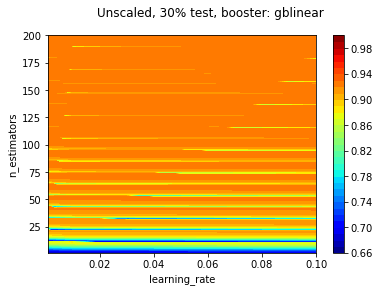

In [364]:
# Contour plot for a chosen booster
booster = 'gblinear' # gbtree, gblinear, dart
ds = scores.loc[scores['booster']==booster] # dataset selection
x_val = ds['learning_rate'].unique()
y_val = ds['n_estimators'].unique()
levels=np.arange(np.floor(np.min(ds['roc_auc'])*100)/100,1.001,0.01)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
plt.contourf(x_val, y_val, np.array(ds['roc_auc']).reshape(len(y_val), len(x_val)),
             levels=levels, cmap='jet'); #https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.colorbar();
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
#plt.ylim(1,200)
plt.suptitle(f'Unscaled, 30% test, booster: {booster}');

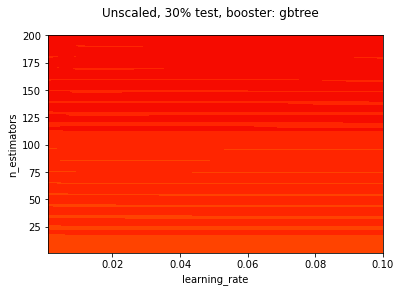

In [365]:
# Contour plot for a chosen booster
booster = 'gbtree' # gbtree, gblinear, dart
ds = scores.loc[scores['booster']==booster] # dataset selection
x_val = ds['learning_rate'].unique()
y_val = ds['n_estimators'].unique()

#https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
plt.contourf(x_val, y_val, np.array(ds['roc_auc']).reshape(len(y_val), len(x_val)),
             levels=levels, cmap='jet'); #https://matplotlib.org/stable/tutorials/colors/colormaps.html
#plt.colorbar();
plt.xlabel('learning_rate')
plt.ylabel('n_estimators')
#plt.ylim(30,45)
plt.suptitle(f'Unscaled, 30% test, booster: {booster}');

In [ ]:
# 'dart' is very close to 'gbtree'
print("gbtree - dart")
xgboost_res.loc[xgboost_res['booster']=="gbtree"]['accuracy'][0:3].values - xgboost_res.loc[xgboost_res['booster']=="dart"]['accuracy'].values
#array([-0.00447645, -0.00467108, -0.00155703])

In [368]:
print("Optimal parameters:")
idx_opt = np.argmax(scores['roc_auc'])
scores.iloc[idx_opt]

Optimal parameters:


booster            gbtree
learning_rate         0.1
n_estimators           70
roc_auc          0.968587
accuracy         0.956014
tnr              0.984996
tpr              0.618227
precision        0.779503
f1                0.68956
mcc              0.671416
Name: 7469, dtype: object

In [369]:
idx_opt = np.argmax(scores.loc[scores['booster']=="gblinear"]['roc_auc'])
scores.iloc[idx_opt]

booster          gblinear
learning_rate         0.1
n_estimators           19
roc_auc          0.926893
accuracy          0.94239
tnr              0.988588
tpr              0.403941
precision        0.752294
f1               0.525641
mcc              0.525347
Name: 3618, dtype: object

In [ ]:
# Initialize score dataframe
scores_csv = "data/xgboost_test30.score.learningrate_nestimators.csv"
#scores_csv = "data/xgboost_std_test30.score.learningrate_nestimators.csv"
if os.path.exists(scores_csv):
    scores = pd.read_csv(scores_csv)
else:
    scores = pd.DataFrame(columns=['booster','learning_rate','n_estimators',
                                'roc_auc','accuracy','tnr','tpr','precision','f1','mcc'])
display(scores.head())
display(scores.tail())

for booster in ['gblinear']: # booster: [gbtree, dart, gblinear]
    for learning_rate in np.arange(0.11,1+0.001,0.01):
        for n_estimators in np.arange(70,70+1,1):
            # Train model
            model = XGBClassifier(booster=booster, learning_rate=learning_rate, n_estimators=n_estimators,
                                  eval_metric='logloss', use_label_encoder=False).fit(X_train, y_train)
            # Evaluate predictions
            roc_auc,accuracy,tnr,tpr,precision,f1,mcc = scores_all(X_test, y_test, model);
            scores = scores.append({'booster':booster,'learning_rate':round(learning_rate,3),'n_estimators':n_estimators,
                              'roc_auc':roc_auc,'accuracy':accuracy,'tnr':tnr,'tpr':tpr,'precision':precision,'f1':f1,'mcc':mcc}, ignore_index=True)
        scores.to_csv(scores_csv, index=False)
scores.sort_values(by=['booster','learning_rate'], inplace=True)
scores.drop_duplicates()
scores.to_csv(scores_csv, index=False)

,booster,learning_rate,n_estimators,roc_auc,accuracy,tnr,tpr,precision,f1,mcc
0,gblinear,0.001,1,0.669427,0.920981,1.0,0.0,NaN,0.0,NaN
1,gblinear,0.001,2,0.670528,0.920981,1.0,0.0,NaN,0.0,NaN
2,gblinear,0.001,3,0.671420,0.920981,1.0,0.0,NaN,0.0,NaN
3,gblinear,0.001,4,0.672366,0.920981,1.0,0.0,NaN,0.0,NaN
4,gblinear,0.001,5,0.673262,0.920981,1.0,0.0,NaN,0.0,NaN


,booster,learning_rate,n_estimators,roc_auc,accuracy,tnr,tpr,precision,f1,mcc
7685,gbtree,0.96,70,0.947240,0.944726,0.976965,0.568966,0.679412,0.619303,0.592452
7686,gbtree,0.97,70,0.940570,0.951343,0.982037,0.593596,0.739264,0.658470,0.637030
7687,gbtree,0.98,70,0.945982,0.947061,0.979924,0.564039,0.706790,0.627397,0.603712
7688,gbtree,0.99,70,0.944109,0.950564,0.979713,0.610837,0.720930,0.661333,0.637403
7689,gbtree,1.00,70,0.944824,0.947256,0.980135,0.564039,0.708978,0.628258,0.604817


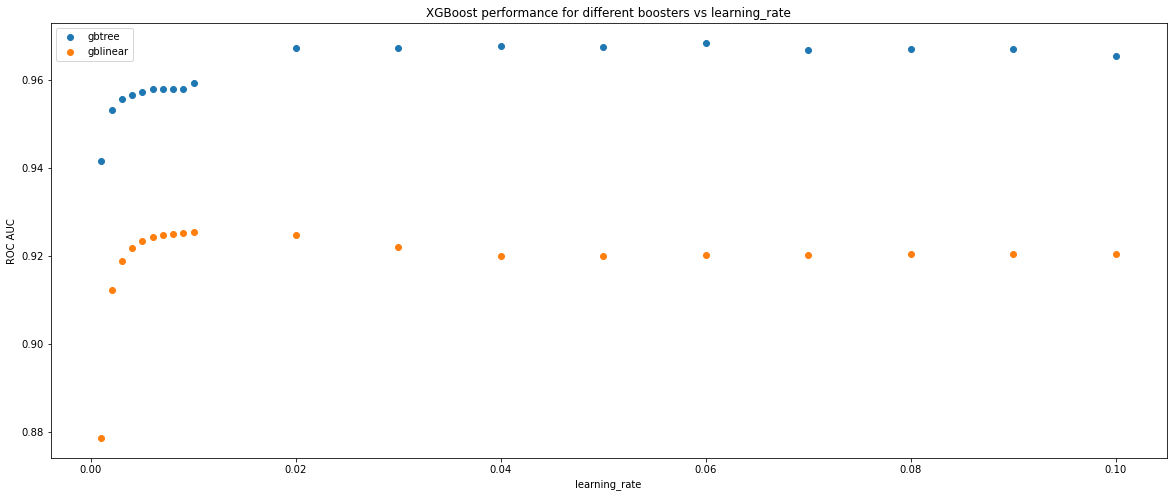

In [372]:
n_estimators = 196
plt.figure(figsize=(20, 8))
for booster in ['gbtree','gblinear']:
    ds = scores.loc[(scores['booster']==booster) & (scores['n_estimators']==n_estimators)] # selection dataset
    plt.scatter( x = ds['learning_rate'], y = ds['roc_auc'], label=booster);
plt.title('XGBoost performance for different boosters vs learning_rate');
plt.xlabel('learning_rate');
plt.ylabel('ROC AUC');
plt.legend(['gbtree','gblinear']);

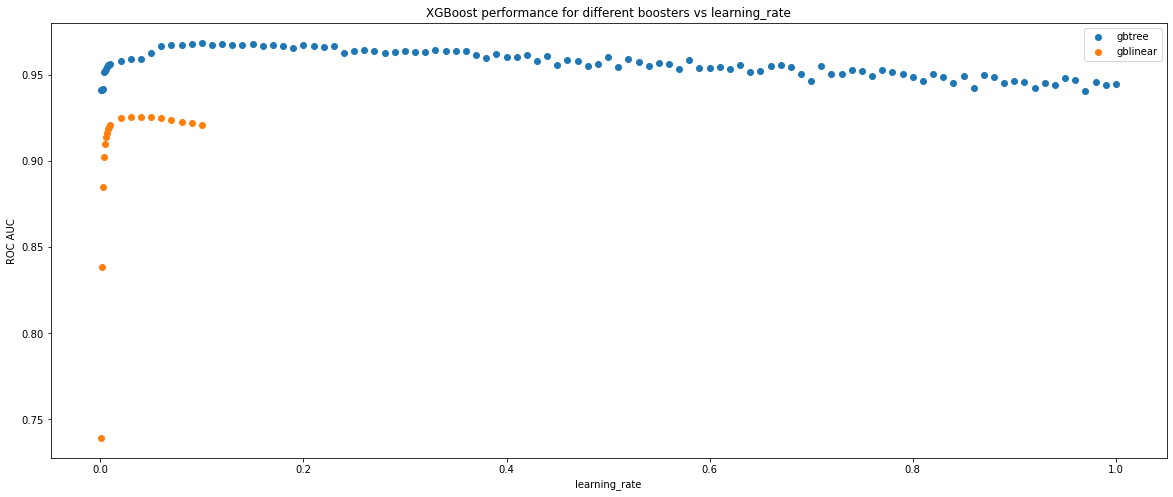

In [373]:
n_estimators = 70
plt.figure(figsize=(20, 8))
for booster in ['gbtree','gblinear']:
    ds = scores.loc[(scores['booster']==booster) & (scores['n_estimators']==n_estimators)] # selection dataset
    plt.scatter( x = ds['learning_rate'], y = ds['roc_auc'], label=booster);
plt.title('XGBoost performance for different boosters vs learning_rate');
plt.xlabel('learning_rate');
plt.ylabel('ROC AUC');
plt.legend(['gbtree','gblinear']);

In [ ]:
# Delete below later!

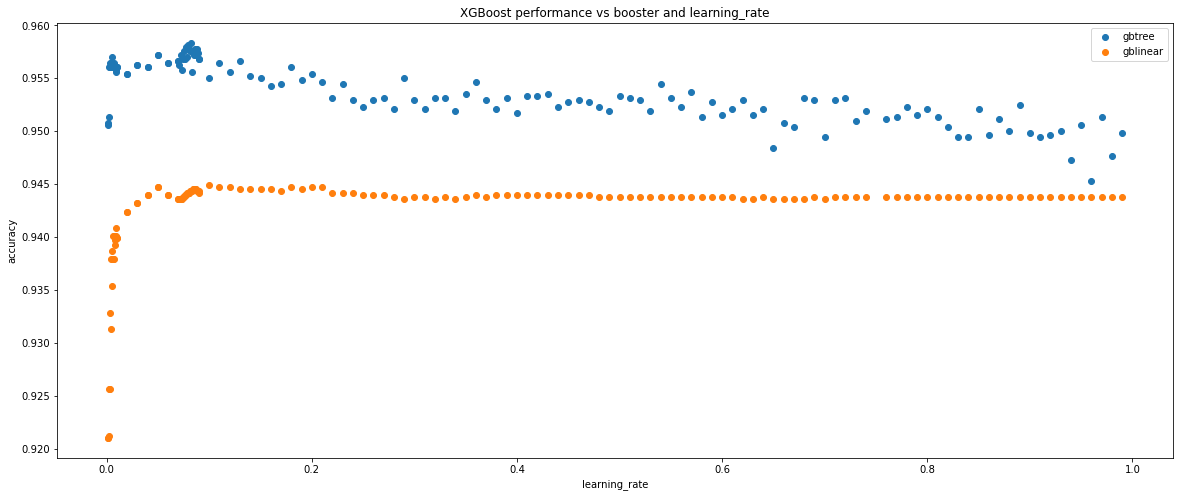

In [267]:
plt.figure(figsize=(20, 8))
for booster in ['gbtree','gblinear']:
    plt.scatter( x = scores.loc[scores['booster']==booster]['learning_rate'],
           y = scores.loc[scores['booster']==booster]['roc_auc'], label=booster);
plt.title('XGBoost performance for different boosters vs learning_rate');
plt.xlabel('learning_rate');
plt.ylabel('ROC AUC');
plt.legend(['gbtree','gblinear']);

In [276]:
?XGBClassifier